In [1]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras. datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

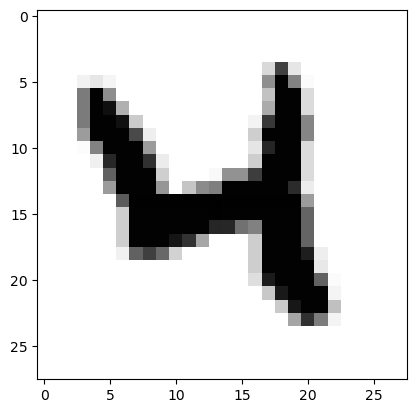

In [5]:
plt.imshow(x_train[20])
plt.imshow(x_train[20], cmap = plt.cm.binary)

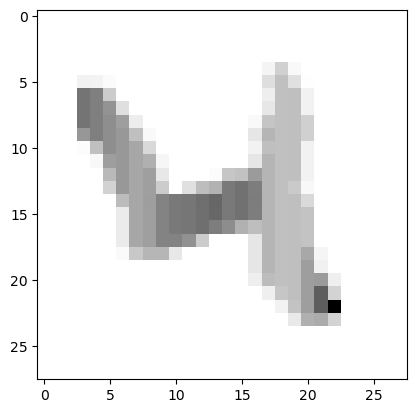

In [6]:
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[20], cmap = plt.cm.binary)

In [7]:
print (y_train[20])

4


In [8]:
IMG_SIZE=28
x_trainr= np.array(x_train).reshape (-1, IMG_SIZE, IMG_SIZE, 1)
x_testr= np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print ("Training Samples dimension",x_train.shape)
print ("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28)
Testing Samples dimension (10000, 28, 28, 1)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow. keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [10]:
model = Sequential ()

Metal device set to: Apple M1


In [13]:
##### First Convolution Layer 0 1 2 3 (60000, 28, 28, 1) 28-3+1 = 26×26
model.add(Conv2D(64, (3,3), input_shape = x_train.shape[1:]))
model. add(Activation ("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
##### 2nd Convolution Layer 26-3+1= 24*24 
model.add(Conv2D (64, (3,3))) ## 2nd Convolution Layer 
model.add(Activation("relu"))## activation funtion 
## MaxPooling

In [14]:
##### 3rd Convolution Layer 
model.add(Conv2D (64, (3,3))) # 24*24 
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size= (2,2)))

In [15]:
#### Fully Connected Layer # 1 20x20= 400
model.add (Flatten()) ### before using fully connected layer, need to be flatten so that 2D to ID 
model.add (Dense(64)) # 
model.add(Activation("relu"))

In [16]:
#### Fully Connected Laver # 2
model.add (Dense (32))
model.add(Activation("relu"))

In [17]:
#### Last Fully Connected Layer, output must be equal to number of classes, 10 (0-9)
model.add(Dense (10)) ## this last dense laver must be equal to 10
model.add(Activation('softmax')) ### activation function is changed to Softmax (Class probabilites )

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [33]:
print ("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [20]:
model.compile(loss ="sparse_categorical_crossentropy", optimizer ="adam", metrics=[ 'accuracy'])

In [21]:
model.fit (x_trainr,y_train, epochs=10, validation_split = 0.3) ## Training my model

Epoch 1/10


2023-05-16 21:47:05.437174: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1313/1313 [==============================] - 24s 18ms/step - loss: 0.1767 - accuracy: 0.9448 - val_loss: 0.0714 - val_accuracy: 0.9786
Epoch 2/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0542 - accuracy: 0.9835 - val_loss: 0.0522 - val_accuracy: 0.9836
Epoch 3/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.0594 - val_accuracy: 0.9814
Epoch 4/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.0546 - val_accuracy: 0.9853
Epoch 5/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0477 - val_accuracy: 0.9869
Epoch 6/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.0392 - val_accuracy: 0.9898
Epoch 7/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.0496 - val_accura

In [22]:
### Evaluateing on testing data set MNIT
test_loss, test_acc = model.evaluate(x_testr, y_test) 
print ("Test Loss on 10,000 test samples", test_loss)
print ("Validation Accuracy on 10,000 test samples", test_acc )

313/313 [==============================] - 2s 8ms/step - loss: 0.0459 - accuracy: 0.9886
Test Loss on 10,000 test samples 0.04593798890709877
Validation Accuracy on 10,000 test samples 0.9886000156402588


In [23]:
predictions=model.predict([x_testr])

313/313 [==============================] - 2s 7ms/step


In [24]:
print(predictions)

[[1.0310561e-12 5.7561465e-08 2.4346050e-09 ... 9.9999964e-01
  1.4466077e-13 1.4645831e-07]
 [1.5713751e-09 1.4172837e-10 1.0000000e+00 ... 7.3175979e-11
  7.0759533e-13 1.1715018e-16]
 [3.0634054e-12 9.9999988e-01 2.5239222e-10 ... 7.4937798e-09
  9.3715088e-12 9.8308389e-11]
 ...
 [3.2434778e-17 4.1724006e-11 2.7193059e-13 ... 3.4841718e-14
  8.2939203e-14 2.9982067e-12]
 [4.6498843e-11 1.5414072e-14 1.5000051e-14 ... 5.8543184e-11
  1.4879333e-08 4.5290789e-12]
 [2.2920547e-06 3.0184133e-08 8.5977575e-08 ... 3.4755692e-09
  1.0000786e-05 2.8796012e-09]]


In [25]:
print(np.argmax(predictions[0]))

7


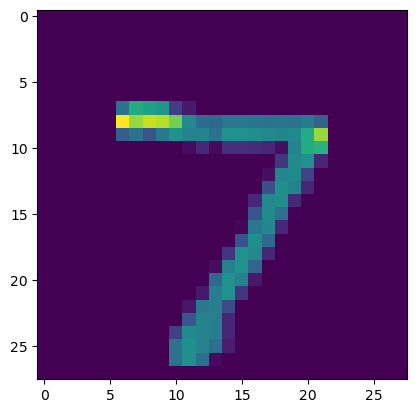

In [26]:
### now to check that is our answer is true or not
plt.imshow(x_test[0])

In [27]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [34]:
import cv2

In [36]:
img = cv2.imread('img.jpeg')

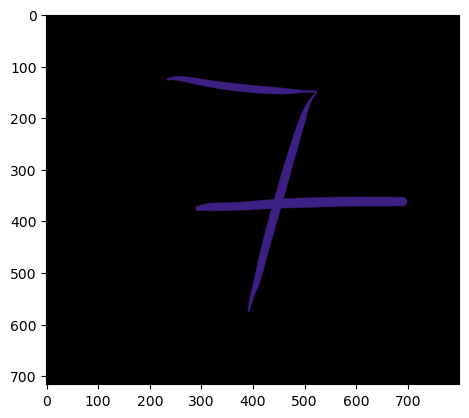

In [37]:
plt.imshow(img)

In [38]:
img.shape

(716, 800, 3)

In [39]:
gray = cv2. cvtColor (img, cv2.COLOR_BGR2GRAY)

In [40]:
gray.shape

(716, 800)

In [41]:
resized = cv2.resize(gray,(28,28), interpolation = cv2. INTER_AREA)

In [42]:
resized.shape

(28, 28)

In [43]:
newimg = tf.keras.utils.normalize (resized, axis = 1)

In [44]:
newimg= np.array (newimg) .reshape (-1, IMG_SIZE, IMG_SIZE, 1) # kernel operation of convoution Layer,

In [45]:
newimg.shape

(1, 28, 28, 1)

In [46]:
predicions = model.predict (newimg)
print (np.argmax (predicions))

1/1 [==============================] - 0s 99ms/step
1


In [47]:
img2 = cv2.imread('img2.jpeg')

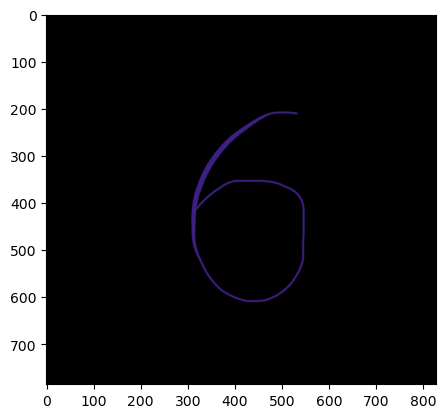

In [48]:
plt.imshow(img2)

In [49]:
gray2 = cv2. cvtColor (img2, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray2,(28,28), interpolation = cv2. INTER_AREA)
newimg2 = tf.keras.utils.normalize (resized, axis = 1)
newimg2= np.array (newimg2) .reshape (-1, IMG_SIZE, IMG_SIZE, 1)
predicions = model.predict (newimg2)
print (np.argmax (predicions))

1/1 [==============================] - 0s 18ms/step
6


In [50]:
model.save("mnist_model.h5")      